#### [예제 0] 컨벌루션 파이썬 코드 구현 및 컨벌루션 결과 이미지 확인



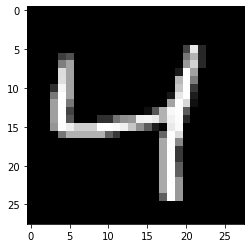

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# mnist data download
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[2], cmap='gray') # 2 번째 데이터 
plt.show()

#### 이미지 필터 정의 (예전에는 직접 계산하였지만, 이젠 딥러닝으로 자동학습함)

In [ ]:
import numpy as np

horizontal_filter = np.array([[1., 1., 1.], 
                             [0., 0., 0.], 
                             [-1., -1., -1.]])

vertical_filter = np.array([[1., 0., -1.],
                           [1., 0., -1.],
                           [1., 0., -1.]])

sharpen_filter = np.array([[0., -1., 0.],
                           [-1., 5., -1.],
                           [0., -1., 0.]])

blur_filter = np.array([[0.11, 0.11, 0.11],
                        [0.11, 0.11, 0.11],
                        [0.11, 0.11, 0.11]])

edge_1_filter = np.array([[1., 0., -1.],
                           [0., 0., 0.],
                           [-1., 0., 1.]])

edge_2_filter = np.array([[0., -1., 0.],
                           [-1., 4., -1.],
                           [0., -1., 0.]])

edge_3_filter = np.array([[-1., -1., -1.],
                           [-1., 8., -1.],
                           [-1., -1., -1.]])


# conv2d_simple()
컨볼루션 연산 함수, stride = 1, padding 없이 순수 연산 수행

In [ ]:
def conv2d_simple(input_image, filter, filter_size):

    original_image_size = input_image.shape[0]

    conv_output_size = int((original_image_size - 3)/1 + 1)

    filtered_image = np.zeros((conv_output_size, conv_output_size))

    for i in range(conv_output_size):

        for j in range(conv_output_size):

            # 컨볼루션 연산
            conv_result = input_image[i:(i + filter_size), j:(j + filter_size)] * filter
            conv_sum = np.sum(conv_result)

            if(conv_sum > 255):
                conv_sum = 255
                
            filtered_image[i, j] = conv_sum
      
    return filtered_image

컨볼루션 연산 수행 및 결과 확인

In [ ]:
vertical_filtered_image = conv2d_simple(x_train[2], vertical_filter, 3)

horizontal_filtered_image = conv2d_simple(x_train[2], horizontal_filter, 3)

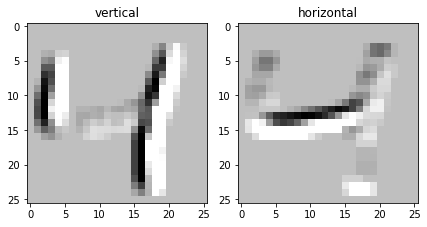

In [ ]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
blur_filtered_image = conv2d_simple(x_train[2], blur_filter, 3)

sharpen_filtered_image = conv2d_simple(x_train[2], sharpen_filter, 3)

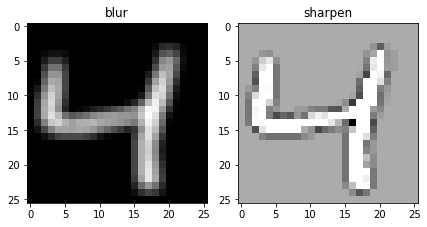

In [ ]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('blur')
plt.imshow(blur_filtered_image,cmap='gray')

plt.subplot(1, 2, 2)
plt.title('sharpen')
plt.imshow(sharpen_filtered_image,cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
edge_1_filtered_image = conv2d_simple(x_train[2], edge_1_filter, 3)

edge_2_filtered_image = conv2d_simple(x_train[2], edge_2_filter, 3)

edge_3_filtered_image = conv2d_simple(x_train[2], edge_3_filter, 3)

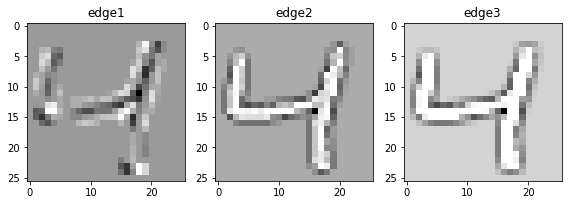

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(1, 3, 1)
plt.title('edge1')
plt.imshow(edge_1_filtered_image,cmap='gray')

plt.subplot(1, 3, 2)
plt.title('edge2')
plt.imshow(edge_2_filtered_image,cmap='gray')

plt.subplot(1, 3, 3)
plt.title('edge3')
plt.imshow(edge_3_filtered_image,cmap='gray')

plt.tight_layout()
plt.show()

#### 다야한 이미지 필터를 적용한 sobel image

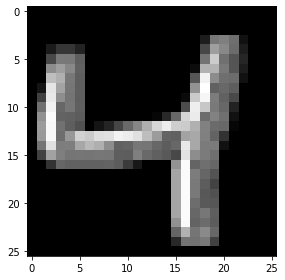

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) 
+ np.square(vertical_filtered_image)
+np.square(blur_filtered_image)
+np.square(sharpen_filtered_image))

plt.imshow(sobel_image,cmap='gray')

plt.tight_layout()
plt.show()